In [1]:
import statsmodels.api as sm 
from statsmodels.tsa.stattools import adfuller 
import pandas as pd 
import numpy as np 
import statsmodels.formula.api as smf 
from sklearn import linear_model 
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import bds
import pandas_datareader as data

In [2]:
ibm=data.DataReader("IBM",
                        start='2015-9-1',
                        end='2021-6-28',
                        data_source='yahoo')
ibm

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-08-31,148.399994,146.259995,147.380005,147.889999,4093100.0,115.018608
2015-09-01,144.979996,141.850006,144.910004,142.679993,5272000.0,110.966637
2015-09-02,145.080002,143.179993,144.740005,145.050003,4252000.0,112.809868
2015-09-03,148.029999,145.770004,146.050003,146.779999,3603500.0,114.155334
2015-09-04,145.399994,143.320007,144.570007,143.699997,4201100.0,111.759918
...,...,...,...,...,...,...
2021-06-22,146.809998,145.350006,146.520004,146.360001,2437000.0,146.360001
2021-06-23,146.500000,144.570007,146.429993,144.610001,3202600.0,144.610001
2021-06-24,146.190002,144.690002,145.800003,145.440002,3609700.0,145.440002


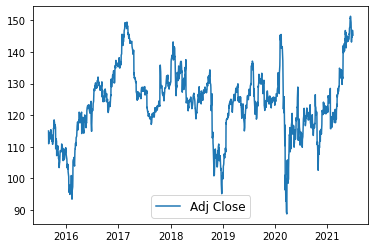

In [3]:
plt.plot(ibm['Adj Close'],label='Adj Close')
plt.legend(loc='best', fontsize='large')
plt.show()

In [4]:
X = ibm['Adj Close'].values
result = adfuller(X, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
	print('\t%s:%.3f'%(key,value))
if result[0] < result [4] ["5%"]:
	print("Reject Ho_ Time Series is then stationary")
else: 
	print("Failed to Reject Ho_ Time Series is then non-stationary")

ADF Statistic: -3.5015951438881134
n_lags: 0.007946221767420042
p-value: 0.007946221767420042
	1%:-3.435
	5%:-2.864
	10%:-2.568
Reject Ho_ Time Series is then stationary


In [5]:
result = adfuller(X, maxlag=None, regression='ct', autolag='AIC', store=False, regresults=False)
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
	print('\t%s:%.3f'%(key,value))
if result[0] < result [4] ["5%"]:
	print("Reject Ho_ Time Series is then stationary")
else: 
	print("Failed to Reject Ho_ Time Series is then non-stationary")

ADF Statistic: -3.541601859506801
n_lags: 0.03514564425297219
p-value: 0.03514564425297219
	1%:-3.965
	5%:-3.414
	10%:-3.129
Reject Ho_ Time Series is then stationary


In [6]:
arima=ARIMA(ibm['Adj Close'].values,exog=None, order=(1, 0, 1), seasonal_order=(0, 0, 0, 0), trend=None, enforce_stationarity=True, enforce_invertibility=True, concentrate_scale=True)
results = arima.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1467
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -3018.427
Date:                Thu, 01 Jul 2021   AIC                           6044.854
Time:                        20:52:11   BIC                           6066.018
Sample:                             0   HQIC                          6052.747
                               - 1467   Scale                            3.578
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        123.6740      3.637     34.005      0.000     116.546     130.802
ar.L1          0.9873      0.004    252.309      0.000       0.980       0.995
ma.L1         -0.0583      0.019     -3.143      0.0

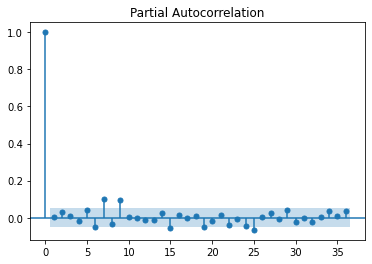

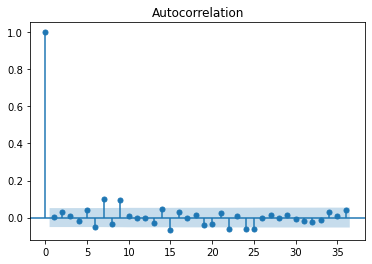

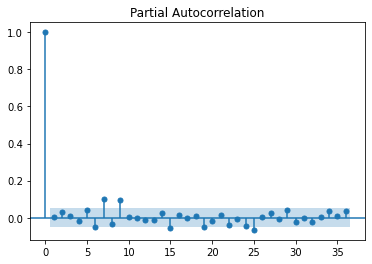

In [7]:
dtr = results.resid
sm.graphics.tsa.plot_acf(dtr.squeeze(),lags=36)
sm.graphics.tsa.plot_pacf(dtr.squeeze(),lags=36)

In [8]:
from scipy import stats
stats.describe(dtr)

DescribeResult(nobs=1467, minmax=(-14.728437648849706, 10.861670607996189), mean=0.015851755018674023, variance=3.6298473248723195, skewness=-0.8975744236525754, kurtosis=8.566353067615609)

In [9]:
test = bds(X, max_dim=2, epsilon=None, distance=2)
test

(array(1.65445364), array(0.09803538))